In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from common.utilities import global_path

In [6]:
## PRESENTATION LAYER
df_holdings = pd.read_csv(global_path.holdings_gold_file_path_v2)

# Convert datetime to date string
df_holdings["date"] = pd.to_datetime(df_holdings["date"])

# Group by the 'date' column and calculate the sum for each date
df_holdings = df_holdings.groupby("date")[["holding_amount", "current_value"]].sum().reset_index()

# setting date column as index
df_holdings = df_holdings.sort_values(by="date").reset_index(drop=True)

df_holdings["pnl_amount"] = (
    df_holdings["current_value"] - df_holdings["holding_amount"]
)
df_holdings["pnl_percentage"] = (
    df_holdings["pnl_amount"] / df_holdings["holding_amount"]
) * 100

df_holdings

,date,holding_amount,current_value,pnl_amount,pnl_percentage
0,2020-04-21,1051.40,1038.66,-12.74,-1.211718
1,2020-04-22,1051.40,1056.02,4.62,0.439414
2,2020-04-23,1051.40,1052.52,1.12,0.106525
3,2020-04-24,1051.40,1032.36,-19.04,-1.810919
4,2020-04-25,1051.40,1032.36,-19.04,-1.810919
...,...,...,...,...,...
1565,2024-08-03,59914.74,191553.03,131638.29,219.709357
1566,2024-08-04,59914.74,191553.03,131638.29,219.709357
1567,2024-08-05,59914.74,179199.02,119284.28,199.090040
1568,2024-08-06,59914.74,179127.57,119212.83,198.970787


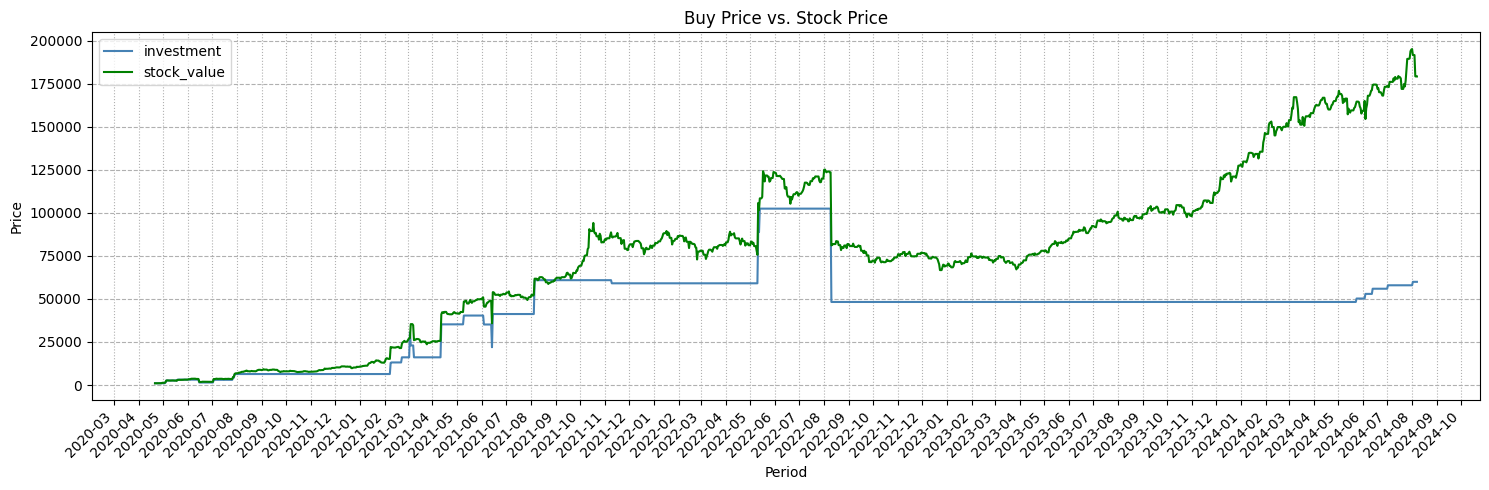

In [7]:
# plot the graph
fig, ax = plt.subplots(figsize=(15, 5))

# plot individual lines
ax.plot(df_holdings["date"], df_holdings["holding_amount"], label="investment", color="steelblue")
ax.plot(df_holdings["date"], df_holdings["current_value"], label="stock_value", color="green")

# set major ticks to months and format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.grid(True, which="major", linestyle=":")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Add a grid to the y-axis
ax.yaxis.grid(True, which="major", linestyle="--")

# add axis labels and a title
plt.ylabel("Price")
plt.xlabel("Period")
plt.title("Buy Price vs. Stock Price")
ax.legend()

# display plot
plt.tight_layout()
plt.show()

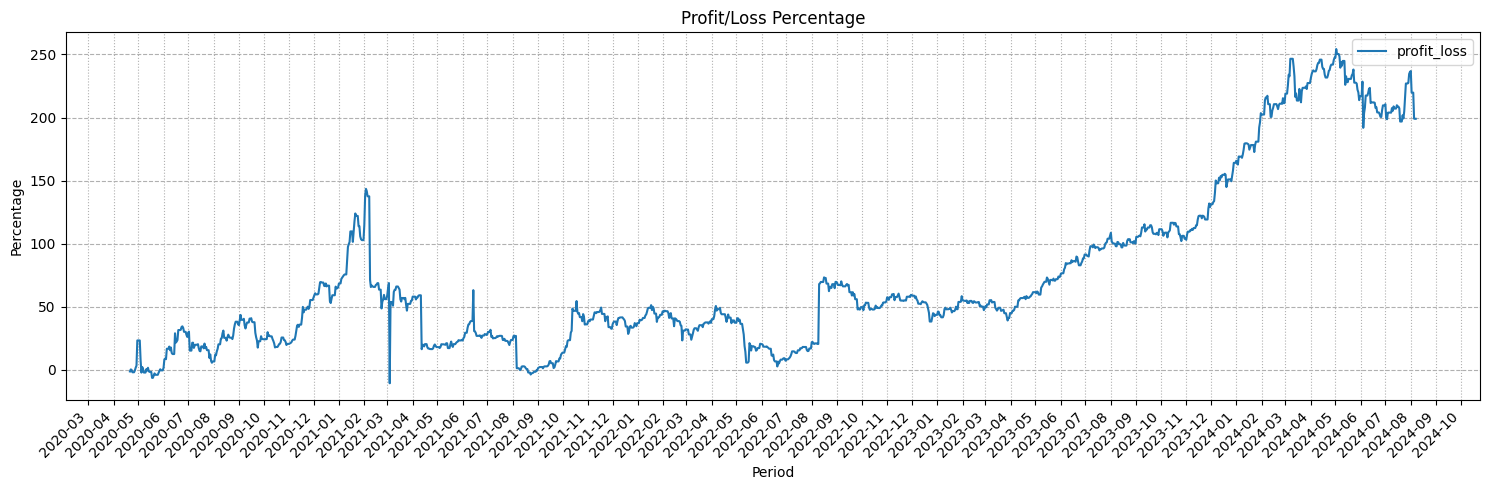

In [8]:
# plot the graph
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_holdings["date"], df_holdings["pnl_percentage"], label="profit_loss")

# set major ticks to months and format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.grid(True, which="major", linestyle=":")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Add a grid to the y-axis
ax.yaxis.grid(True, which="major", linestyle="--")

# add axis labels and a title
plt.ylabel("Percentage")
plt.xlabel("Period")
plt.title("Profit/Loss Percentage")
ax.legend()

# display plot
plt.tight_layout()
plt.show()